In [161]:
import pandas as pd
import numpy as np

In [162]:
from matplotlib import pyplot as plt
import re

In [184]:
from os import listdir, rename
from os.path import isfile, join
onlyfiles = [f for f in listdir('/home/ADNI_cut/') if isfile(join('/home/ADNI_cut/', f))]

In [164]:
# # rename all files 
# for file in onlyfiles:
#     new_file = file.replace('-', '_')
#     rename('/home/ADNI_cut/' + file, '/home/ADNI_cut/' + new_file)

In [185]:
onlyfiles = [f for f in listdir('/home/ADNI_cut/') if isfile(join('/home/ADNI_cut/', f))]

In [215]:
cv = pd.read_csv('/home/ADNI-processed/data.csv')

In [220]:
cv['Group'].value_counts()

CN      658
MCI     322
EMCI    160
AD      100
SMC      84
LMCI     76
Name: Group, dtype: int64

In [187]:
cv = cv.drop(columns=['Unnamed: 0'])
cv.head()


,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,File Names
0,1048378,941_S_6581,CN,F,74,1,MRI,Accelerated Sagittal MPRAGE,Original,9/12/2018,DCM,3/22/2020,941_S_6581-Accelerated_Sagittal_MPRAGE-2018-09...
1,1046736,941_S_6580,CN,F,80,1,MRI,Accelerated Sagittal MPRAGE,Original,9/07/2018,DCM,3/22/2020,941_S_6580-Accelerated_Sagittal_MPRAGE-2018-09...
2,1226810,941_S_6580,CN,F,81,102,MRI,Accelerated Sagittal MPRAGE,Original,9/13/2019,DCM,3/22/2020,941_S_6580-Accelerated_Sagittal_MPRAGE-2019-09...
3,1045984,941_S_6575,CN,M,73,1,MRI,Accelerated Sagittal MPRAGE,Original,9/05/2018,DCM,3/22/2020,941_S_6575-Accelerated_Sagittal_MPRAGE-2018-09...
4,1227239,941_S_6575,CN,M,75,102,MRI,Accelerated Sagittal MPRAGE,Original,9/16/2019,DCM,3/22/2020,941_S_6575-Accelerated_Sagittal_MPRAGE-2019-09...


In [188]:
cv['NoSkullFileName'] = cv['File Names']

In [189]:
cv.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,File Names,NoSkullFileName
0,1048378,941_S_6581,CN,F,74,1,MRI,Accelerated Sagittal MPRAGE,Original,9/12/2018,DCM,3/22/2020,941_S_6581-Accelerated_Sagittal_MPRAGE-2018-09...,941_S_6581-Accelerated_Sagittal_MPRAGE-2018-09...
1,1046736,941_S_6580,CN,F,80,1,MRI,Accelerated Sagittal MPRAGE,Original,9/07/2018,DCM,3/22/2020,941_S_6580-Accelerated_Sagittal_MPRAGE-2018-09...,941_S_6580-Accelerated_Sagittal_MPRAGE-2018-09...
2,1226810,941_S_6580,CN,F,81,102,MRI,Accelerated Sagittal MPRAGE,Original,9/13/2019,DCM,3/22/2020,941_S_6580-Accelerated_Sagittal_MPRAGE-2019-09...,941_S_6580-Accelerated_Sagittal_MPRAGE-2019-09...
3,1045984,941_S_6575,CN,M,73,1,MRI,Accelerated Sagittal MPRAGE,Original,9/05/2018,DCM,3/22/2020,941_S_6575-Accelerated_Sagittal_MPRAGE-2018-09...,941_S_6575-Accelerated_Sagittal_MPRAGE-2018-09...
4,1227239,941_S_6575,CN,M,75,102,MRI,Accelerated Sagittal MPRAGE,Original,9/16/2019,DCM,3/22/2020,941_S_6575-Accelerated_Sagittal_MPRAGE-2019-09...,941_S_6575-Accelerated_Sagittal_MPRAGE-2019-09...


In [190]:
for i in range(len(cv['NoSkullFileName'])):
    cv['NoSkullFileName'].iloc[i] = '_home_ADNI_' + cv['NoSkullFileName'].iloc[i]
    cv['NoSkullFileName'].iloc[i] = cv['NoSkullFileName'].iloc[i].replace('-', '_')


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [191]:
cv.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,File Names,NoSkullFileName
0,1048378,941_S_6581,CN,F,74,1,MRI,Accelerated Sagittal MPRAGE,Original,9/12/2018,DCM,3/22/2020,941_S_6581-Accelerated_Sagittal_MPRAGE-2018-09...,_home_ADNI_941_S_6581_Accelerated_Sagittal_MPR...
1,1046736,941_S_6580,CN,F,80,1,MRI,Accelerated Sagittal MPRAGE,Original,9/07/2018,DCM,3/22/2020,941_S_6580-Accelerated_Sagittal_MPRAGE-2018-09...,_home_ADNI_941_S_6580_Accelerated_Sagittal_MPR...
2,1226810,941_S_6580,CN,F,81,102,MRI,Accelerated Sagittal MPRAGE,Original,9/13/2019,DCM,3/22/2020,941_S_6580-Accelerated_Sagittal_MPRAGE-2019-09...,_home_ADNI_941_S_6580_Accelerated_Sagittal_MPR...
3,1045984,941_S_6575,CN,M,73,1,MRI,Accelerated Sagittal MPRAGE,Original,9/05/2018,DCM,3/22/2020,941_S_6575-Accelerated_Sagittal_MPRAGE-2018-09...,_home_ADNI_941_S_6575_Accelerated_Sagittal_MPR...
4,1227239,941_S_6575,CN,M,75,102,MRI,Accelerated Sagittal MPRAGE,Original,9/16/2019,DCM,3/22/2020,941_S_6575-Accelerated_Sagittal_MPRAGE-2019-09...,_home_ADNI_941_S_6575_Accelerated_Sagittal_MPR...


In [197]:
cv['NoSkullFileName'].iloc[0] + '.npy', onlyfiles[0]

('_home_ADNI_941_S_6581_Accelerated_Sagittal_MPRAGE_2018_09_12_13_47_41.0_S727038.npy',
 '_home_ADNI_168_S_6817_Accelerated_Sagittal_MPRAGE_MPR_Cor_2019_10_03_11_35_42.0_S880494.npy')

In [198]:
image_path_prefix = '/home/'
bad_ind = []
bad_files = []
for i in range(len(cv['NoSkullFileName'])):
    if (cv['NoSkullFileName'].iloc[i] + '.npy') not in onlyfiles:
        bad_ind.append(i)
        bad_files.append(cv['NoSkullFileName'].iloc[i])

In [199]:
len(bad_ind), len(onlyfiles), len(cv['NoSkullFileName'])

(31, 1380, 1400)

In [200]:
len(cv[~cv['NoSkullFileName'].isin(bad_files)])

1369

In [204]:
cv_processed = cv[~cv['NoSkullFileName'].isin(bad_files)]
cv_processed = cv_processed.drop(columns=['File Names'])
cv_processed.rename(columns={'NoSkullFileName':'File Names'}, inplace=True)
cv_processed.to_csv('/home/ADNI_cut/data.csv')

In [205]:
cv_processed.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,File Names
0,1048378,941_S_6581,CN,F,74,1,MRI,Accelerated Sagittal MPRAGE,Original,9/12/2018,DCM,3/22/2020,_home_ADNI_941_S_6581_Accelerated_Sagittal_MPR...
1,1046736,941_S_6580,CN,F,80,1,MRI,Accelerated Sagittal MPRAGE,Original,9/07/2018,DCM,3/22/2020,_home_ADNI_941_S_6580_Accelerated_Sagittal_MPR...
2,1226810,941_S_6580,CN,F,81,102,MRI,Accelerated Sagittal MPRAGE,Original,9/13/2019,DCM,3/22/2020,_home_ADNI_941_S_6580_Accelerated_Sagittal_MPR...
3,1045984,941_S_6575,CN,M,73,1,MRI,Accelerated Sagittal MPRAGE,Original,9/05/2018,DCM,3/22/2020,_home_ADNI_941_S_6575_Accelerated_Sagittal_MPR...
4,1227239,941_S_6575,CN,M,75,102,MRI,Accelerated Sagittal MPRAGE,Original,9/16/2019,DCM,3/22/2020,_home_ADNI_941_S_6575_Accelerated_Sagittal_MPR...


(230, 230, 175)


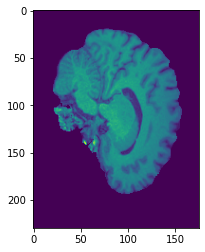

In [209]:
cv_new = pd.read_csv('/home/ADNI_cut/data.csv')

row = cv_new.sample(1)
image_path_prefix = '/home/ADNI_cut/'
img = np.load(image_path_prefix + row['File Names'].iloc[0]+'.npy', allow_pickle=True)
print(img.shape)
plt.imshow(img[100, :, :])

In [218]:
cv_new['Group'].value_counts()

CN      641
MCI     318
EMCI    157
AD       98
SMC      82
LMCI     73
Name: Group, dtype: int64

#old 
CN      658
MCI     322
EMCI    160
AD      100
SMC      84
LMCI     76

In [211]:
cv_new.shape

(1369, 14)

Наверно можно заюзать эти 10 изображений если откапать старую csv

In [147]:
names_in_csv = cv['NoSkullFileName'].values
names_in_csv = [name[9:] for name in names_in_csv]

In [149]:
set(onlyfiles).difference(set(names_in_csv))

{'_home_ADNI_031_S_2018_Sagittal_3D_Accelerated_MPRAGE_2019_01_24_11_26_13.0_S788128.npy',
 '_home_ADNI_031_S_2233_Sagittal_3D_Accelerated_MPRAGE_2019_02_21_09_37_51.0_S890637.npy',
 '_home_ADNI_031_S_4149_Sagittal_3D_Accelerated_MPRAGE_2019_02_27_12_09_21.0_S801543.npy',
 '_home_ADNI_035_S_6841_Accelerated_Sagittal_MPRAGE_Phase_A_P_2019_12_13_12_51_18.0_S905706.npy',
 '_home_ADNI_051_S_6527_Accelerated_Sagittal_MPRAGE_2018_08_29_13_37_41.0_S723541.npy',
 '_home_ADNI_114_S_4404_Accelerated_Sagittal_MPRAGE_2019_10_24_12_25_00.0_S897962.npy',
 '_home_ADNI_129_S_6482_Accelerated_Sag_IR_FSPGR_2018_07_13_14_21_25.0_S704609.npy',
 '_home_ADNI_131_S_6170_Sagittal_3D_Accelerated_MPRAGE_2018_05_14_17_45_03.0_S685474.npy',
 '_home_ADNI_131_S_6519_Sagittal_3D_Accelerated_MPRAGE_2018_07_31_15_43_05.0_S713874.npy',
 '_home_ADNI_305_S_6263_Sagittal_3D_Accelerated_MPRAGE_2018_03_07_12_56_45.0_S664904.npy'}

(154, 256, 256)
(160, 240, 256)
(160, 256, 256)
(208, 240, 256)
(211, 256, 256)
(165, 256, 256)
(196, 256, 256)
(170, 256, 256)
(171, 256, 256)
(208, 240, 256)


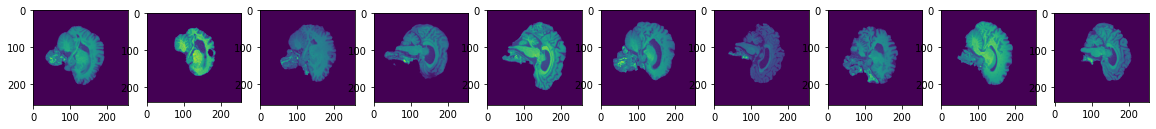

In [159]:
not_in_csv_images = list(set(onlyfiles).difference(set(names_in_csv)))
fig, ax = plt.subplots(1, len(not_in_csv_images), figsize=(20, 10))

for i, image_name in enumerate(not_in_csv_images):

    img = np.load(image_path_prefix + 'ADNI_cut/' + image_name, allow_pickle=True)
    ax[i].imshow(img[100, :, :])
    print(img.shape)

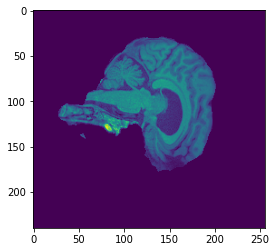

In [156]:
old_cv = pd.read_csv('/home/ADNI/')